### Lecture 20: Handling Missing Values using Simple Imputer class (Mean/Median)

Steps
1. Checking which columns have MCAR (Missing completely at random)
2. Splitting data into training & testing
3. Seperating columns on which we apply Imputation
  <br> a. Making sure Nan Values are MCAR
1. Make Function of Simple Imputer Class
2. Fit_Transform Input Data (Training/Test)
3. Making New DataFrame with changes (For visualization)
4. Visualizing Changes 

Importing Useful Libraries

In [294]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

Importing Data

In [295]:
df=pd.read_csv('insurance.csv',usecols=['age','bmi','smoker'])
df.head()


,age,bmi,smoker
0,19.0,27.900,yes
1,18.0,33.770,no
2,28.0,33.000,no
3,33.0,22.705,no
4,32.0,28.880,no


Step 1

In [296]:
df.isnull().mean()*100

age       17.638266
bmi        9.417040
smoker     0.000000
dtype: float64

Step 2

In [297]:
X=df.drop(columns='smoker',axis=1)
Y=df.smoker

In [298]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [299]:
print(X_train.shape)
print(X_test.shape)

(1070, 2)
(268, 2)


Step 3

In [300]:
col=[var for var in X_train.columns if X_train[var].isnull().mean()>0]

In [301]:
print(col)


['age', 'bmi']


In [302]:
X_train.sample(10)

,age,bmi
938,18.0,26.180
250,18.0,NaN
211,40.0,30.875
389,24.0,NaN
104,34.0,27.500
197,45.0,28.600
1139,19.0,32.490
1172,56.0,41.910
492,NaN,25.080
943,19.0,22.610


Step 4

In [303]:
# Making variable of SI class
SI_mean=SimpleImputer(strategy='mean')
SI_median=SimpleImputer(strategy='median')

Step 5

In [304]:
SI_mean.fit(X_train)


SimpleImputer()

In [305]:
SI_median.fit(X_train)

SimpleImputer(strategy='median')

In [306]:
X_train_mean=SI_mean.transform(X_train)
X_test_mean=SI_mean.transform(X_test)

X_train_median=SI_median.transform(X_train)
X_test_median=SI_median.transform(X_test)


Step 6

In [307]:
df_mean=pd.DataFrame(X_train_mean,columns=X_train.columns)
df_median=pd.DataFrame(X_train_median,columns=X_train.columns)

In [314]:
df_mean

,age,bmi
0,46.000000,30.433144
1,47.000000,24.320000
2,52.000000,24.860000
3,39.000000,34.320000
4,39.315254,21.470000
...,...,...
1065,39.315254,31.350000
1066,39.000000,23.870000
1067,58.000000,25.175000
1068,37.000000,47.600000


In [308]:
df_mean.isnull().mean()

age    0.0
bmi    0.0
dtype: float64

In [309]:
df_median.isnull().mean()

age    0.0
bmi    0.0
dtype: float64

Visualization

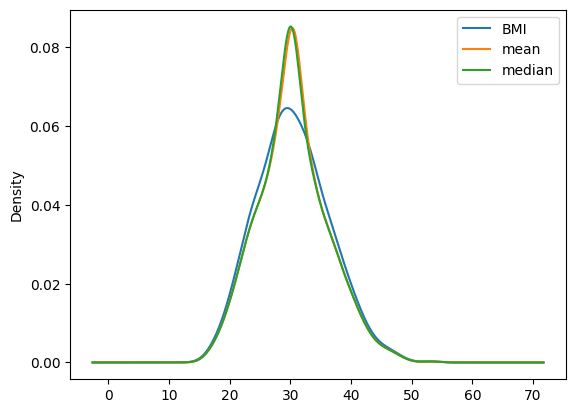

In [310]:
# BMi

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['bmi'].plot(kind='kde',ax=axis,label='BMI')
df_mean['bmi'].plot(kind='kde',ax=axis,label='mean')
df_median['bmi'].plot(kind='kde',ax=axis,label='median')
axis=plt.legend()

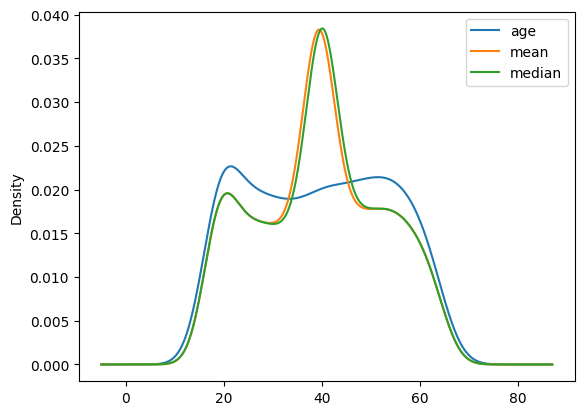

In [312]:
# age

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['age'].plot(kind='kde',ax=axis,label='age')
df_mean['age'].plot(kind='kde',ax=axis,label='mean')
df_median['age'].plot(kind='kde',ax=axis,label='median')
axis=plt.legend()

In [313]:
print(f'Variance Before: {X_train['age'].var()}\nAfter Mean Imputation: {df_mean['age'].var()}')

Variance Before: 198.62561546130837
After Mean Imputation: 164.2516782673495
